In [1]:
%matplotlib inline
import os
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pyGadget
#mpl.rc('font', size=20.)
#mpl.rc('font', family='serif')
#mpl.rc('text', usetex=True)

In [2]:
sim = pyGadget.sim.Simulation('stampede/halo2_restart0',length='pc', coordinates='physical')

In [6]:
snap0 = sim.load_snapshot(147)
snap1 = sim.load_snapshot(148)
snap2 = sim.load_snapshot(640)
snap3 = sim.load_snapshot(641)

In [7]:
snap0.header.Redshift, snap3.header.Redshift

(21.917744965482218, 21.701499945328713)

In [8]:
for snap in [snap1,snap2, snap0, snap3]:
    snap.gas.load_coords()
    snap.gas.load_masses()
    snap.gas.load_number_density()
    snap.gas.load_PIDs()
    snap.gas.load_sinks()
del snap

In [9]:
snap0.gas.describe()

,x,y,z,masses,ndensity,particleIDs,sink_value
count,11035050.000000,11035050.000000,11035050.000000,11035050.000000,11035050.000000,11035050.000000,11035050
mean,360.484201,398.043568,393.164445,0.023163,42.835305,5653094.451667,0
std,89.636628,91.372319,74.545350,0.069674,374.829868,3191504.936639,0
min,0.000000,0.000000,0.000000,0.014425,0.001031,1.000000,0
25%,293.775681,355.582643,349.234590,0.014425,0.156957,2897821.250000,0
50%,369.539117,390.919624,388.763315,0.014425,0.496284,5656583.500000,0
75%,417.752539,467.723195,439.036451,0.014425,1.572909,8415345.750000,0
max,742.376337,740.166037,760.618913,0.923173,9983.994080,11174108.000000,0


In [1]:
.014425 * 32 * 1.5

0.6924

In [10]:
snap3.gas.describe()

,x,y,z,masses,ndensity,particleIDs,sink_value
count,11032540.000000,11032540.000000,11032540.000000,11032540.000000,1.103254e+07,11032540.000000,1.103254e+07
mean,374.286055,395.920469,408.057514,0.023168,4.619072e+06,5652681.422024,5.438458e-07
std,86.374308,89.724836,71.655783,0.070004,8.219383e+08,3191392.919735,1.042924e-03
min,13.821271,-1.113952,24.952311,0.014425,5.910600e-05,1.000000,0.000000e+00
25%,312.131723,354.758487,364.637705,0.014425,1.444624e-01,2897813.750000,0.000000e+00
50%,381.540230,388.515362,402.540637,0.014425,4.479532e-01,5655948.500000,0.000000e+00
75%,429.372046,464.678465,453.102256,0.014425,1.454198e+00,8414083.250000,0.000000e+00
max,754.417642,736.685163,768.570601,16.689245,1.000000e+12,11174108.000000,2.000000e+00


In [11]:
gb1 = snap1.gas.groupby(snap1.gas.masses)

In [15]:
gb1.count()

,x,y,z,masses,ndensity,particleIDs,sink_value
masses,,,,,,,
0.014425,10566936,10566936,10566936,10566936,10566936,10566936,10566936
0.115397,407253,407253,407253,407253,407253,407253,407253
0.923173,60861,60861,60861,60861,60861,60861,60861


In [13]:
gb2 = snap2.gas.groupby(snap2.gas.masses)

In [14]:
gb2.mean()

,x,y,z,masses,ndensity,particleIDs,sink_value
masses,,,,,,,
0.014425,374.458022,395.911292,408.166414,0.014425,4.409274e+06,5861339,0
0.115397,372.204139,395.820560,405.030672,0.115397,1.327374e-01,1064083,0
0.548134,382.722246,371.829372,394.156500,0.548134,1.000000e+12,9273748,2
0.923173,358.348328,398.184988,409.388735,0.923173,1.514611e-01,137753,0
5.120728,382.723168,371.834367,394.139762,5.120728,1.000000e+12,9273588,2
13.862026,382.723286,371.834581,394.139678,13.862026,1.000000e+12,9245872,2
16.674820,382.721115,371.830319,394.147697,16.674820,1.000000e+12,189043,2


In [12]:
sinks1 = snap1.gas[snap1.gas.sink_value > 0]
sinks2 = snap2.gas[snap2.gas.sink_value > 0]
bigM1 = snap1.gas[snap1.gas.masses > 1]
bigM2 = snap2.gas[snap2.gas.masses > 1]

In [13]:
sinks1

,x,y,z,masses,ndensity,particleIDs,sink_value
2812378,322.010490,309.812710,322.630716,5.740985,1.000000e+12,2812378,2
1501569,322.010698,309.812834,322.631513,13.862026,1.000000e+12,1501569,2
1492707,322.009449,309.810989,322.631709,15.145814,1.000000e+12,1492707,2
9267047,322.009343,309.810786,322.632057,3.851364,1.000000e+12,9267047,2


In [14]:
bigM1

,x,y,z,masses,ndensity,particleIDs,sink_value
2812378,322.010490,309.812710,322.630716,5.740985,1.000000e+12,2812378,2
1501569,322.010698,309.812834,322.631513,13.862026,1.000000e+12,1501569,2
1492707,322.009449,309.810989,322.631709,15.145814,1.000000e+12,1492707,2
9267047,322.009343,309.810786,322.632057,3.851364,1.000000e+12,9267047,2


In [15]:
sinks2

,x,y,z,masses,ndensity,particleIDs,sink_value
2812378,322.010509,309.812602,322.630817,5.740985,1.000000e+12,2812378,2
1501569,322.010776,309.812831,322.631508,13.876451,1.000000e+12,1501569,2
9267047,322.009579,309.810926,322.632354,3.937912,1.000000e+12,9267047,2
1492707,322.009568,309.810992,322.631873,30.464724,1.000000e+12,1492707,2


In [16]:
bigM2

,x,y,z,masses,ndensity,particleIDs,sink_value
2812378,322.010509,309.812602,322.630817,5.740985,1.000000e+12,2812378,2
1501569,322.010776,309.812831,322.631508,13.876451,1.000000e+12,1501569,2
9267047,322.009579,309.810926,322.632354,3.937912,1.000000e+12,9267047,2
1492707,322.009568,309.810992,322.631873,30.464724,1.000000e+12,1492707,2


In [17]:
sinks1[-sinks1.particleIDs.isin(sinks2.particleIDs)]

,x,y,z,masses,ndensity,particleIDs,sink_value


In [18]:
df1 = snap1.gas
df2 = snap2.gas

###These are the particles that disappear between snapshot 775 and snapshot 776:

In [19]:
lost = df1[-df1.particleIDs.isin(df2.particleIDs)]
lost

,x,y,z,masses,ndensity,particleIDs,sink_value
9223718,322.010513,309.812653,322.631378,0.014425,1.353638e+11,9223718,0
9253816,322.009506,309.811180,322.631386,0.014425,1.220591e+11,9253816,0
9274219,322.009398,309.810999,322.631432,0.014425,1.588622e+11,9274219,0
9271744,322.009423,309.810935,322.631433,0.014425,1.492974e+11,9271744,0
9276564,322.009539,309.810893,322.632299,0.014425,1.528862e+11,9276564,0
9259630,322.009654,309.811145,322.631733,0.014425,1.574214e+11,9259630,0
9250162,322.009430,309.810788,322.632309,0.014425,1.046775e+11,9250162,0
9260998,322.009601,309.811119,322.631906,0.014425,2.321285e+11,9260998,0
2811704,322.009450,309.810705,322.632315,0.014425,8.408014e+10,2811704,0
9271767,322.009645,309.811248,322.631751,0.014425,1.998988e+11,9271767,0


In [20]:
hires = snap1.gas[snap1.gas.ndensity > 1e10]

In [21]:
df1.masses.sum()

255604.52678470343

In [22]:
df2.masses.sum()

255619.70144816375

In [23]:
lost.masses.sum()

0.2452179456515133

In [24]:
df1.masses.sum() - df2.masses.sum()

-15.174663460318698

In [25]:
snap0.gas.masses.sum()

255604.57005845982

In [26]:
snap3.gas.masses.sum()

255619.70144816372

In [27]:
snap0.gas.masses.sum() - snap1.gas.masses.sum()

0.04327375639695674

In [28]:
snap0.gas.masses.sum() - snap2.gas.masses.sum()

-15.13138970392174

In [29]:
snap0.gas.masses.sum() - snap3.gas.masses.sum()

-15.131389703892637

In [30]:
snap2.gas.masses.sum() - snap3.gas.masses.sum()

2.9103830456733704e-11

In [31]:
sinks1.masses - sinks2.masses

1492707   -15.318909
1501569    -0.014425
2812378     0.000000
9267047    -0.086548
Name: masses, dtype: float64

In [32]:
lost

,x,y,z,masses,ndensity,particleIDs,sink_value
9223718,322.010513,309.812653,322.631378,0.014425,1.353638e+11,9223718,0
9253816,322.009506,309.811180,322.631386,0.014425,1.220591e+11,9253816,0
9274219,322.009398,309.810999,322.631432,0.014425,1.588622e+11,9274219,0
9271744,322.009423,309.810935,322.631433,0.014425,1.492974e+11,9271744,0
9276564,322.009539,309.810893,322.632299,0.014425,1.528862e+11,9276564,0
9259630,322.009654,309.811145,322.631733,0.014425,1.574214e+11,9259630,0
9250162,322.009430,309.810788,322.632309,0.014425,1.046775e+11,9250162,0
9260998,322.009601,309.811119,322.631906,0.014425,2.321285e+11,9260998,0
2811704,322.009450,309.810705,322.632315,0.014425,8.408014e+10,2811704,0
9271767,322.009645,309.811248,322.631751,0.014425,1.998988e+11,9271767,0


In [2]:
store = pd.HDFStore(os.getenv("HOME")+'/data/stampede/mass_history.hdf5')
store#2 = pd.HDFStore(os.getenv("HOME")+'/data/stampede/mass_history.hdf5')

<class 'pandas.io.pytables.HDFStore'>
File path: /home/jhummel/data/stampede/mass_history.hdf5
/XR_sfr_1e-0               frame        (shape->[1,14])
/XR_sfr_1e-1               frame        (shape->[1,14])
/XR_sfr_1e-2               frame        (shape->[1,14])
/XR_sfr_1e-3               frame        (shape->[1,14])
/cr00                      frame        (shape->[1,14])
/cr01                      frame        (shape->[1,14])
/cr02                      frame        (shape->[1,14])
/cr03                      frame        (shape->[1,14])
/cr04                      frame        (shape->[1,14])
/cr05                      frame        (shape->[1,14])
/halo1_cr00                frame        (shape->[1,14])
/halo1_cr01                frame        (shape->[1,14])
/halo1_cr02                frame        (shape->[1,14])
/halo1_cr03                frame        (shape->[1,14])
/halo2_restart             frame        (shape->[1,18])
/halo2_restart0            frame        (shape->[1,18])
/halo2_re

In [3]:
h2v = store['halo2_vanilla']
h2r = store['halo2_restart']
restart = store['restart']
restart2 = store['restart2']
#store2['restart'] = restart

In [4]:
store.close()

In [5]:
h2v['1kpc'].max(), h2v['1kpc'].min()

(152494.52048823467, 152491.08743699553)

In [6]:
h2v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 147 to 1217
Data columns (total 18 columns):
z         1071 non-null object
time      1071 non-null object
10cc      1071 non-null object
100cc     1071 non-null object
1e4cc     1071 non-null object
1e6cc     1071 non-null object
1e8cc     1071 non-null object
1e9cc     1071 non-null object
1e10cc    1071 non-null object
1e11cc    1071 non-null object
1kpc      1071 non-null object
100pc     1071 non-null object
10pc      1071 non-null object
1pc       1071 non-null object
.1pc      1071 non-null object
1e4AU     1071 non-null object
5e3AU     1071 non-null object
1e3AU     1071 non-null object
dtypes: object(18)
memory usage: 159.0+ KB


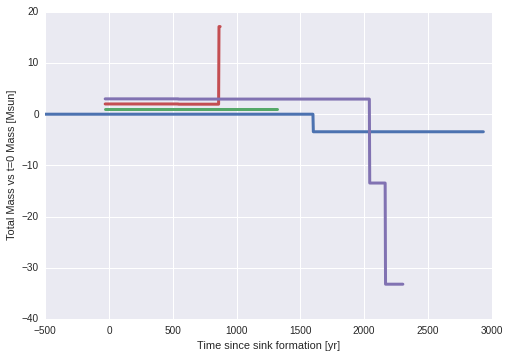

In [7]:
fig, ax = plt.subplots()
for i,sim in enumerate([h2v, h2r, restart, restart2]):
    ax.plot(sim.time, sim['1kpc']-h2v['1kpc'].max()+i, lw=3)
plt.xlim(-500,3000)
plt.ylabel('Total Mass vs t=0 Mass [Msun]')
plt.xlabel('Time since sink formation [yr]')
fig.savefig('figures/refinement/deltaM.png', bbox_inches='tight')

In [8]:
h2r2[['time','1kpc']]

NameError: name 'h2r2' is not defined

In [1]:
snap0.gas

NameError: name 'snap0' is not defined